In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import os
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

cwd = os.getcwd()
date_format = "%Y-%m-%d"
INTERSECTION_PATH = os.path.join(cwd, "..", "data/tornadoes/US_tornadoes_1950_2022.csv")
data_tornado = pd.read_csv(INTERSECTION_PATH)

In [138]:
#num tornados with negative magnitude (unknown)
np.sum(data_tornado['mag']<0)

756

In [139]:
# num tornados with 0 property loss
# (does NOT mean no property damage, just that it was not reported)
np.sum(data_tornado['loss'] == 0)

27172

In [140]:
np.count_nonzero(data_tornado['loss'])

41529

Text(0.5, 1.0, 'Histogram of Property Loss')

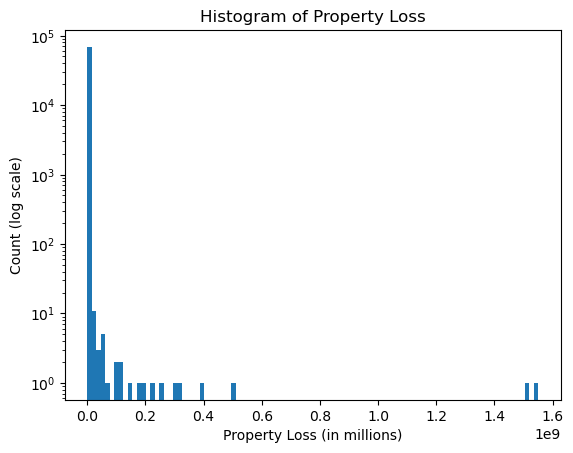

In [141]:
plt.hist(data_tornado['loss'], log=True, bins=100)
plt.xlabel('Property Loss (in millions)')
plt.ylabel('Count (log scale)')
plt.title('Histogram of Property Loss')

<Axes: xlabel='loss'>

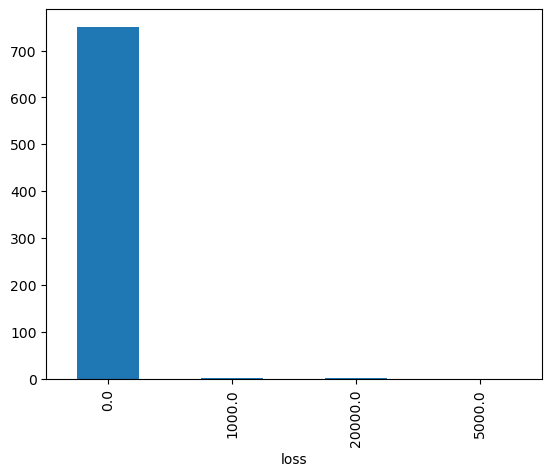

In [142]:
# tornadoes with unknown magnitude and their loss values
unknowns = data_tornado[data_tornado['mag'] == -9]
unknowns['loss'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Histogram of Crop Loss')

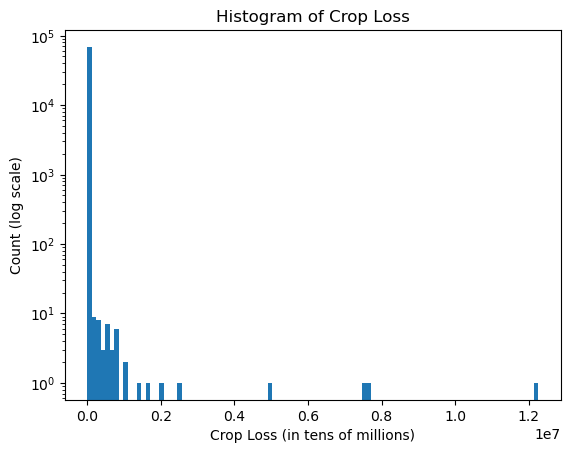

In [143]:
plt.hist(data_tornado['closs'], log=True, bins=100)
plt.xlabel('Crop Loss (in tens of millions)')
plt.ylabel('Count (log scale)')
plt.title('Histogram of Crop Loss')

Text(0.5, 1.0, 'Histogram of Fatalities')

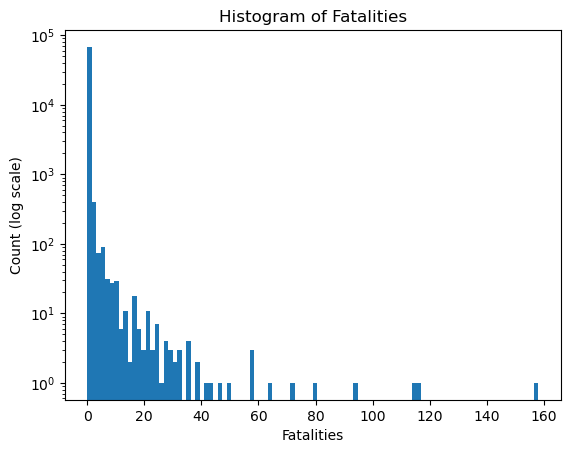

In [144]:
plt.hist(data_tornado['fat'], log=True, bins=100)
plt.xlabel('Fatalities')
plt.ylabel('Count (log scale)')
plt.title('Histogram of Fatalities')

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]),
 [Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

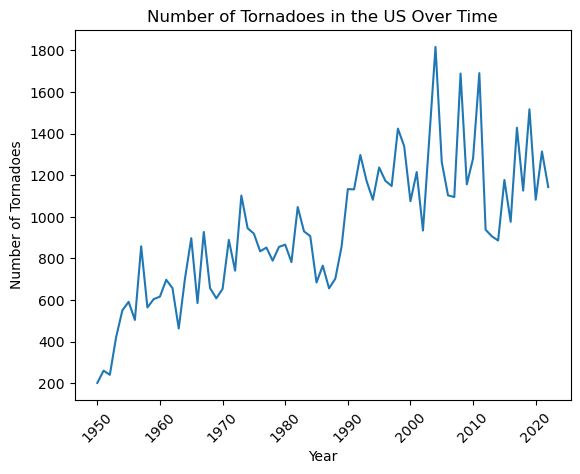

In [145]:
#tornadoes over time
tornadoes_by_year = data_tornado['yr'].value_counts().sort_index()
# print(tornadoes_by_year)
plt.plot(tornadoes_by_year.index, tornadoes_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Number of Tornadoes in the US Over Time')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Number of Tornadoes per month in the US')

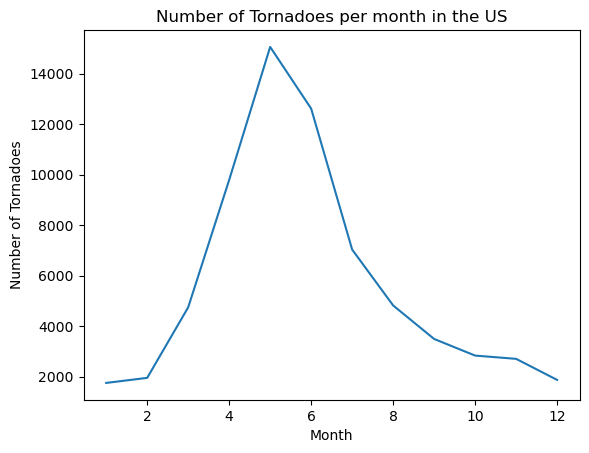

In [146]:
#tornadoes by month
tornadoes_by_month = data_tornado['mo'].value_counts().sort_index()
plt.plot(tornadoes_by_month.index, tornadoes_by_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Tornadoes')
plt.title('Number of Tornadoes per month in the US')

In [161]:
#get total number of tornadoes per month
date_tornado_copy = data_tornado.copy()
date_tornado_copy['date'] = pd.to_datetime(data_tornado['date'], format=date_format)
data_tornado_monthly = date_tornado_copy.set_index('date').resample('ME').size()

In [162]:
data_tornado_monthly

date
1950-01-31     7
1950-02-28    20
1950-03-31    21
1950-04-30    15
1950-05-31    61
              ..
2022-08-31    35
2022-09-30    25
2022-10-31    36
2022-11-30    62
2022-12-31    58
Freq: ME, Length: 876, dtype: int64

In [187]:
#number of years covered
num_years = data_tornado['yr'].nunique()
num_years

73

In [188]:
#get average number of tornadoes per month
avg_num_tornadoes_per_month = data_tornado.groupby('mo').size() / num_years
avg_num_tornadoes_per_month


mo
1.0      24.054795
2.0      26.794521
3.0      65.041096
4.0     134.136986
5.0     206.260274
6.0     172.808219
7.0      96.369863
8.0      66.068493
9.0      47.890411
10.0     38.876712
11.0     37.109589
12.0     25.698630
dtype: float64

<Axes: xlabel='date'>

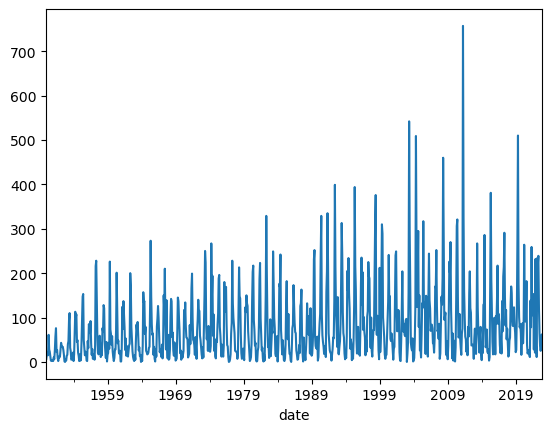

In [150]:
data_tornado_monthly.plot()

In [177]:
import scipy.interpolate as spi

x = avg_num_tornadoes_per_month.index.astype(int)
y = avg_num_tornadoes_per_month.values

#artificially moving the first value to the end to make the interpolation smoother
y[-1] = y[0]
P = spi.CubicSpline(x, y, bc_type='periodic')
plotting_x = np.linspace(0, 24, 100)


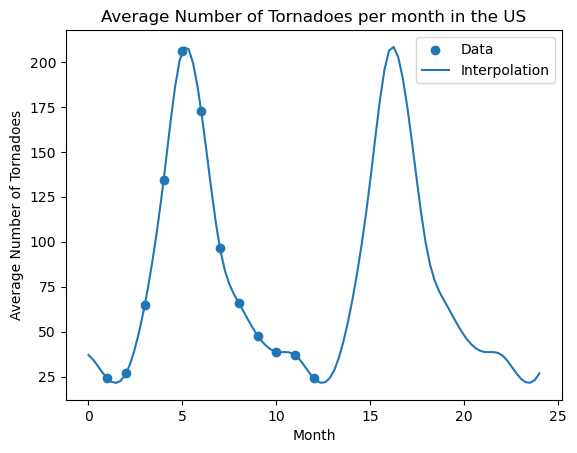

In [180]:
plt.scatter(avg_num_tornadoes_per_month.index, avg_num_tornadoes_per_month.values)
plt.plot(plotting_x, P(plotting_x))
plt.xlabel('Month')
plt.ylabel('Average Number of Tornadoes')
plt.title('Average Number of Tornadoes per month in the US')
plt.legend(['Data', 'Interpolation'])

In [181]:
data_tornado_monthly

date
1950-01-31     7
1950-02-28    20
1950-03-31    21
1950-04-30    15
1950-05-31    61
              ..
2022-08-31    35
2022-09-30    25
2022-10-31    36
2022-11-30    62
2022-12-31    58
Freq: ME, Length: 876, dtype: int64

In [183]:
data_tornado_monthly.size

876

In [209]:
samples = np.arange(1, data_tornado_monthly.size+1)

In [218]:
#de-periodize the data
# treat 1 as January
data_tornado_monthly_deperiodized = data_tornado_monthly - P(samples % 12)

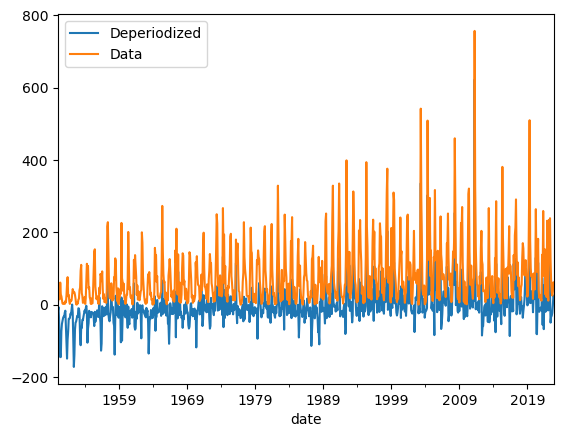

In [230]:
data_tornado_monthly_deperiodized.plot()
# data_tornado_monthly.plot()
# plt.plot(samples[:100], P(samples)[:100])
plt.legend(['Deperiodized', 'Data', 'Interpolation'])